In [1]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
TRAIN_DIR = "/content/drive/My Drive/Signature_classify/train"
TEST_DIR = "/content/drive/My Drive/Signature_classify/test"
BATCH_SIZE = 64 #number of data to train in one iteration

In [37]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.png'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 5 in folder User1
For training data, found 5 in folder User4
For training data, found 5 in folder User5
For training data, found 5 in folder User2
For training data, found 5 in folder User3


In [34]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.png'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 5 in folder User5
For testing data, found 5 in folder User4
For testing data, found 5 in folder User2
For testing data, found 5 in folder User3
For testing data, found 5 in folder User1


In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [7]:
class_names = ['User1','User2','User3','User4','User5']

Image shape (105, 227, 3)
Image shape (104, 230, 3)
Image shape (105, 249, 3)
Image shape (131, 256, 3)
Image shape (60, 162, 3)
Image shape (91, 135, 3)
Image shape (60, 162, 3)
Image shape (90, 186, 3)
Image shape (105, 227, 3)
Image shape (74, 153, 3)
Image shape (91, 135, 3)
Image shape (92, 206, 3)
Image shape (92, 206, 3)
Image shape (87, 162, 3)
Image shape (92, 206, 3)


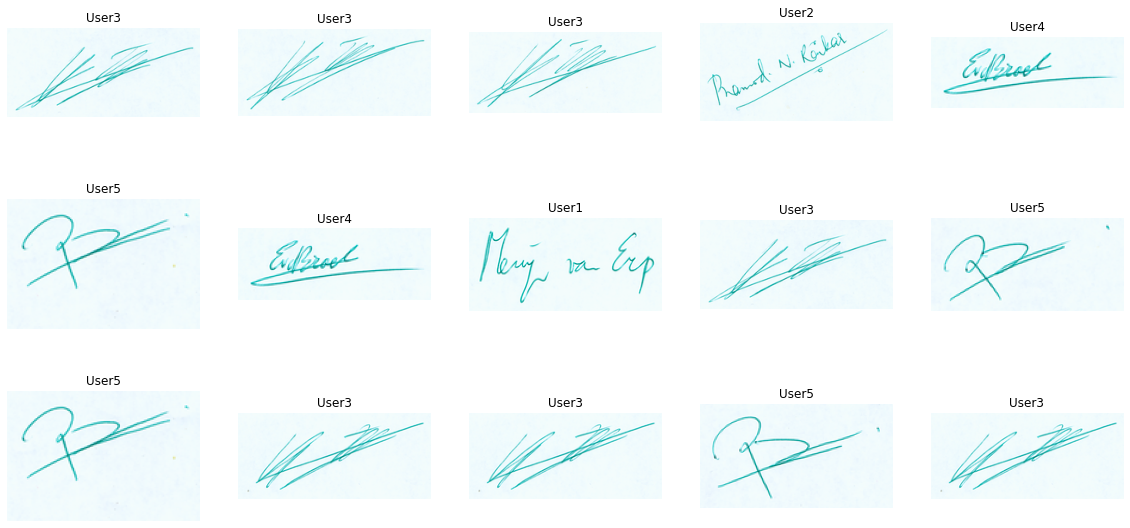

In [8]:
plt.figure(figsize=(20,10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/My Drive/Signature_classify/train/", target_class=class_name)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

#Rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high 
#for our model to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor 

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, #slants the shape of the object - normal shearing
                                   zoom_range = 0.2, #zooms the image
                                   horizontal_flip = True) #flips both rows and coloumns horizontally

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128), #image size
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical') #used to split output in terms of classes

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 25 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [10]:
# Initialising the CNN
classifier = Sequential() #used to create the model layer by layer

# Step 1 - Convolution - has input image of size 128 x 128
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu')) #this is the convolution layer that has a kernel of 3x3 and activation function as relu

# Step 2 - Pooling = down sampling of an image = training on a disproportionately low subset of the majority class examples
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening = Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 5, activation = 'softmax')) # has 5 output nodes as there are 5 classes

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
## model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [12]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('identify_sign.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.6238 - accuracy: 0.2000 - val_loss: 5.4722 - val_accuracy: 0.2000
Epoch 2/50
1/1 [==============================] - 1s 812ms/step - loss: 5.2407 - accuracy: 0.2000 - val_loss: 2.0842 - val_accuracy: 0.2000
Epoch 3/50
1/1 [==============================] - 1s 791ms/step - loss: 2.0531 - accuracy: 0.2000 - val_loss: 2.2991 - val_accuracy: 0.2000
Epoch 4/50
1/1 [==============================] - 1s 773ms/step - loss: 2.2537 - accuracy: 0.2000 - val_loss: 1.9395 - val_accuracy: 0.3600
Epoch 5/50
1/1 [==============================] - 1s 795ms/step - loss: 1.9163 - accuracy: 0.2400 - val_loss: 1.7492 - val_accuracy: 0.3200
Epoch 6/50
1/1 [==============================] - 1s 786ms/step - loss: 1.7388 - accuracy: 0.2000 - val_loss: 1.6107 - val_accuracy: 0.2000
Epoch 7/50
1/1 [==============================] - 1s 802ms/step - loss: 1.6060 - accuracy: 0.2000 - val_loss: 1.6275 - val_accuracy: 0.2000
Epoch 8/50
1/1 [=======

In [13]:
classifier.evaluate(test_set)

1/1 [==============================] - 0s 377ms/step - loss: 0.1823 - accuracy: 1.0000


[0.18229123950004578, 1.0]

Text(0, 0.5, 'Loss')

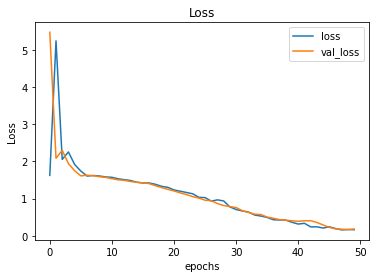

In [14]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

In [38]:
model_path = "identify_sign.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image


#image = cv2.imread("/content/drive/My Drive/Signatures/train/forge/02100001.png") # - forged image
image = cv2.imread("/content/drive/My Drive/Signature_classify/test/User1/00102001.png")


image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
input_user = result + 1
print('The Signature Belongs to: User' + str(input_user))

The Signature Belongs to: User1


In [16]:
training_set.class_indices

{'User1': 0, 'User2': 1, 'User3': 2, 'User4': 3, 'User5': 4}

### Image Similarity checking

In [39]:
#original_signature = cv2.imread("/content/drive/My Drive/Signature_classify/train/User"+ str(input_user)+"/00"+str(input_user)+"0100"+str(input_user)+".png")
original_signatures = []
for i in range(5):
  original_signatures.append("/content/drive/My Drive/Signature_classify/train/User"+ str(input_user)+"/00"+str(input_user)+"0"+str(i)+"00"+str(input_user)+".png")

print(original_signatures)

['/content/drive/My Drive/Signature_classify/train/User1/00100001.png', '/content/drive/My Drive/Signature_classify/train/User1/00101001.png', '/content/drive/My Drive/Signature_classify/train/User1/00102001.png', '/content/drive/My Drive/Signature_classify/train/User1/00103001.png', '/content/drive/My Drive/Signature_classify/train/User1/00104001.png']


In [40]:
input_image = image

In [41]:
import cv2

#Works well with images of different dimensions
def orb_sim(img1, img2):
  # SURF is no longer available in cv2 so using ORB
  orb = cv2.ORB_create()

  # detect keypoints and descriptors
  kp_a, desc_a = orb.detectAndCompute(img1, None)
  kp_b, desc_b = orb.detectAndCompute(img2, None)

  # define the bruteforce matcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
  #perform matches. 
  matches = bf.match(desc_a, desc_b)
  #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
  similar_regions = [i for i in matches if i.distance < 60]  
  # if len(matches) == 0:
  #   return 0
  return len(similar_regions) / len(matches)

# img1 = cv2.imread('/content/drive/My Drive/Car.jpg', 0)  # 714 x 901 pixels
# img3 = cv2.imread('/content/drive/My Drive/Heli.jpg', 0)  # 203 x 256 pixels


#orb_similarity = orb_sim(original_signature, input_image)  #1.0 means identical. Lower = not similar
max_identical = 0
orb_similarity = 0
for i in range(len(original_signatures)):
  original_signature = cv2.imread(original_signatures[i])
  orb_similarity = orb_sim(original_signature, input_image)
  if max_identical < orb_similarity:
    max_identical = orb_similarity


print("Similarity using ORB is: ", max_identical)
if max_identical > 0.7:
  print("The Signature geniune")
else:
  print("The Signature is forged")

Similarity using ORB is:  0.7666666666666667
The Signature geniune


## SIFT

In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [43]:
def SIFT(image1,image2):
  # Convert the training image to RGB
  training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
  testing_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
  # Convert the training image to gray scale
  training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)
  testing_gray = cv2.cvtColor(testing_image, cv2.COLOR_RGB2GRAY)
  # Display traning image and testing image
  fx, plots = plt.subplots(1, 2, figsize=(20,10))
  plots[0].set_title("Training Image")
  plots[0].imshow(training_image)
  plots[1].set_title("Testing Image")
  plots[1].imshow(testing_image)
  #now checking whether the image matches using SIFT algorithm
  surf = cv2.SIFT_create()

  train_keypoints, train_descriptor = surf.detectAndCompute(training_gray, None)
  test_keypoints, test_descriptor = surf.detectAndCompute(testing_gray, None)

  keypoints_without_size = np.copy(training_image)
  keypoints_with_size = np.copy(training_image)

  keypoints_without_size1 = np.copy(testing_image)
  keypoints_with_size1 = np.copy(testing_image)

  cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

  cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  cv2.drawKeypoints(testing_image, test_keypoints, keypoints_without_size1, color = (0, 255, 0))

  cv2.drawKeypoints(testing_image, test_keypoints, keypoints_with_size1, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  # Display image with and without keypoints size
  fx, plots = plt.subplots(1, 2, figsize=(20,10))

  plots[0].set_title("Train keypoints With Size")
  plots[0].imshow(keypoints_with_size, cmap='gray')

  plots[1].set_title("Train keypoints Without Size")
  plots[1].imshow(keypoints_without_size, cmap='gray')

  # Print the number of keypoints detected in the training image
  print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

  # Print the number of keypoints detected in the query image
  print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))
  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

  # Perform the matching between the SURF descriptors of the training image and the test image
  matches = bf.match(train_descriptor, test_descriptor)

  # The matches with shorter distance are the ones we want.
  matches = sorted(matches, key = lambda x : x.distance)
  similar_regions=[i for i in matches if i.distance<1000 ]

  # if(len(matches)==0):
  #     return 0
  return (len(similar_regions)/len(matches))


Number of Keypoints Detected In The Training Image:  10
Number of Keypoints Detected In The Query Image:  1028
Number of Keypoints Detected In The Training Image:  17
Number of Keypoints Detected In The Query Image:  1028
Number of Keypoints Detected In The Training Image:  9
Number of Keypoints Detected In The Query Image:  1028
Number of Keypoints Detected In The Training Image:  13
Number of Keypoints Detected In The Query Image:  1028
Number of Keypoints Detected In The Training Image:  23
Number of Keypoints Detected In The Query Image:  1028
Similarity using SIFT is:  0.47058823529411764
The Signature geniune


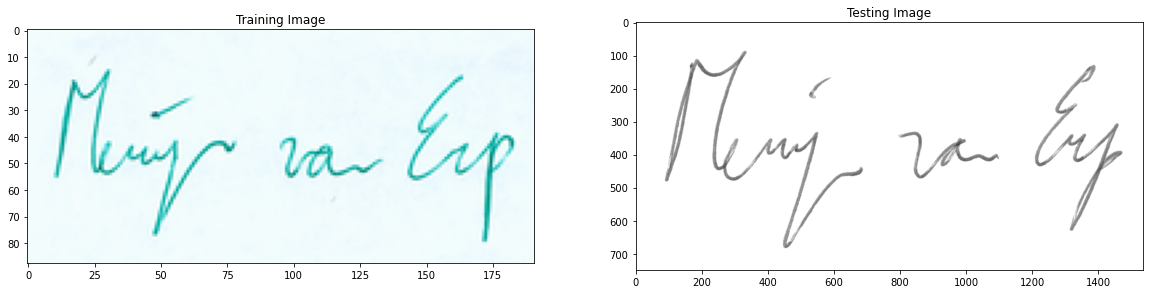

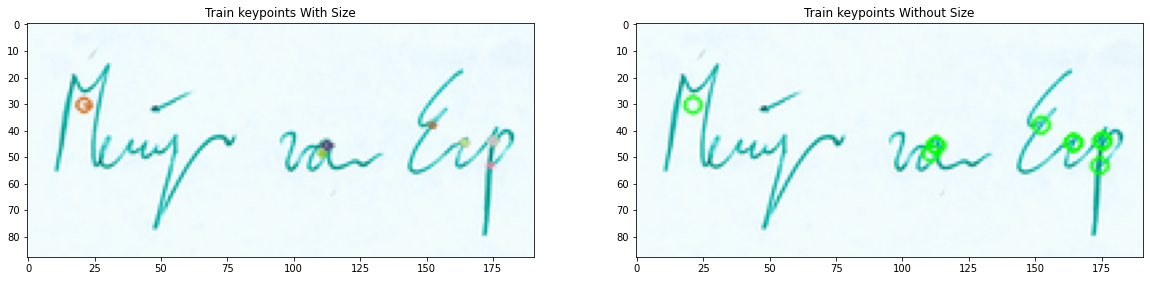

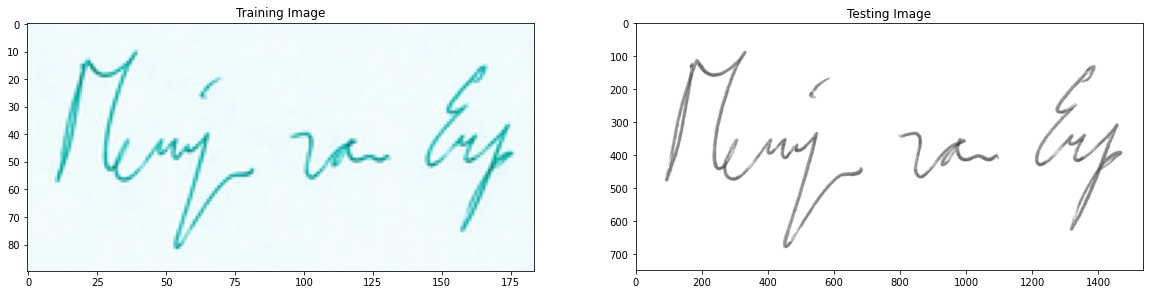

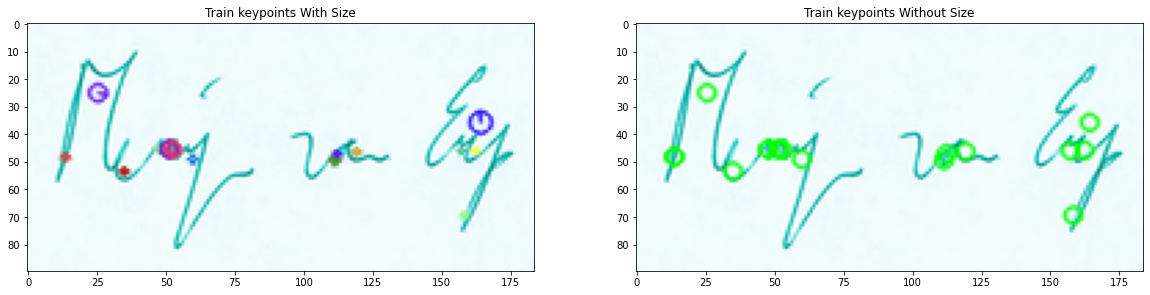

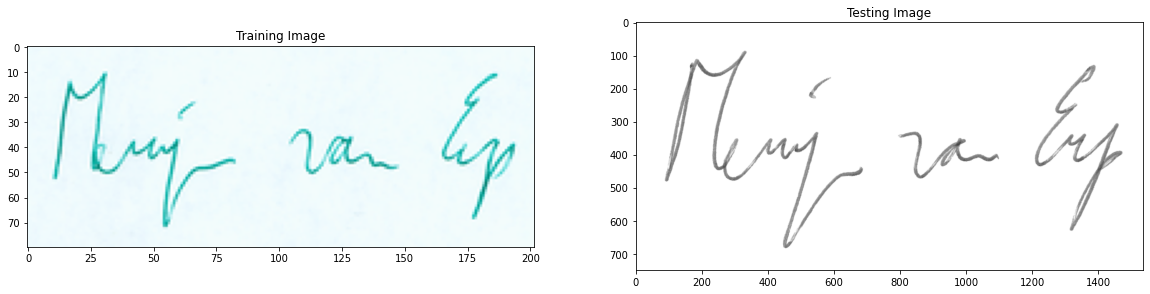

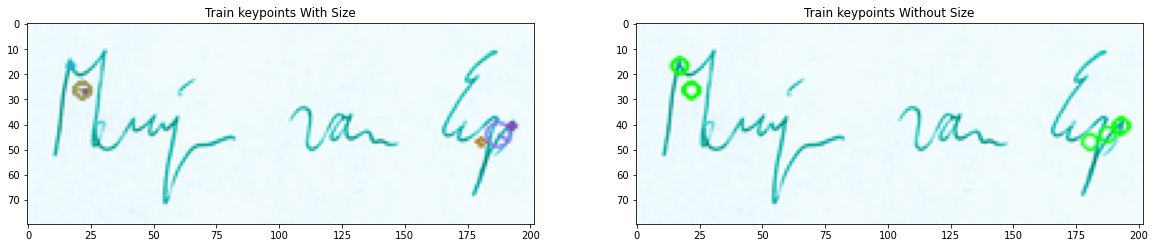

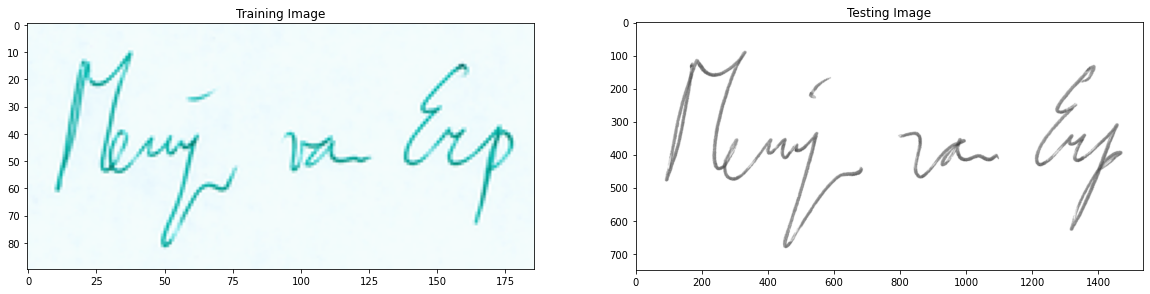

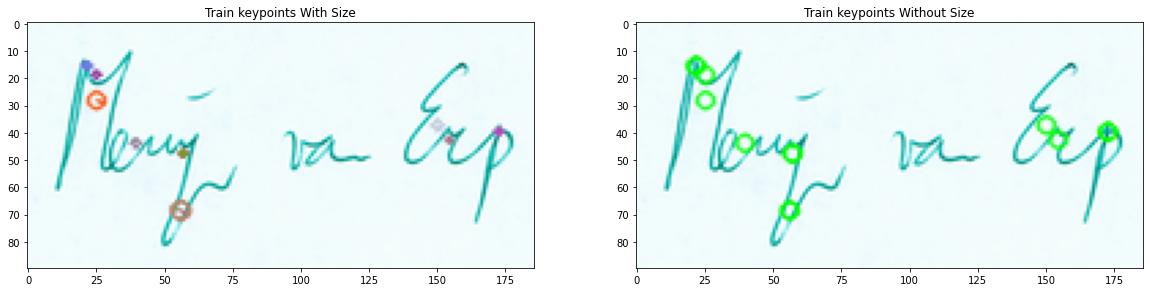

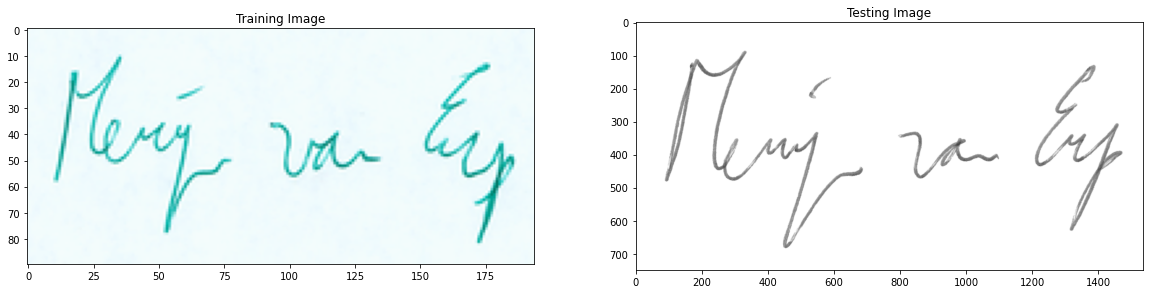

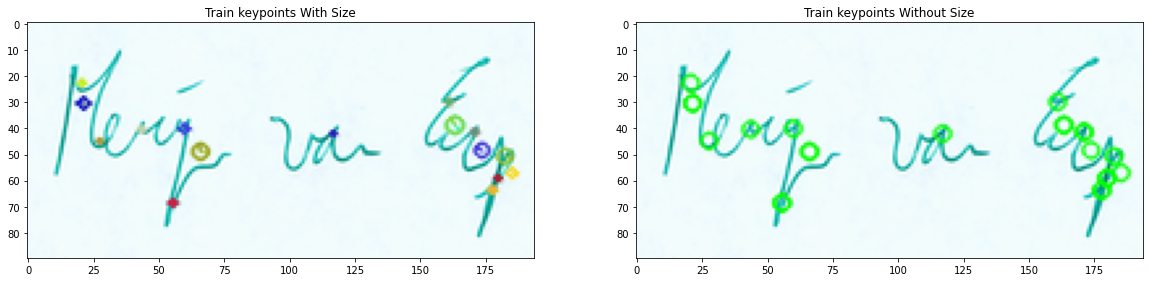

In [44]:
max_identical = 0
sift_similarity = 0
for i in range(len(original_signatures)):
  original_signature = cv2.imread(original_signatures[i])
  sift_similarity = SIFT(original_signature, input_image)
  if max_identical < sift_similarity:
    max_identical = sift_similarity


print("Similarity using SIFT is: ", max_identical)
if max_identical > 0:
  print("The Signature geniune")
else:
  print("The Signature is forged")